# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/Documents/MIDS/W207/project1/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

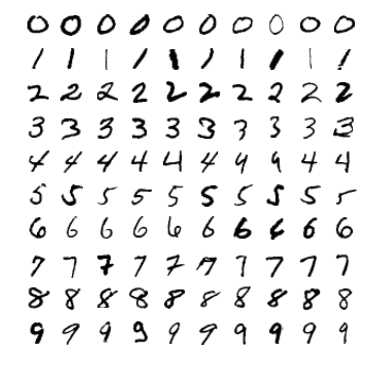

In [363]:
def P1(num_examples=10):

### STUDENT START ###
# Use a list to keep track of how many examples of each digit we have plotted so far
    n = [0] * 10
    
    # set the plot area size
    plt.figure(figsize=(6,6))
    
    # Run through the labels looking for 10 examples of each digit. As we find each new
    # example, plot the example and increment in the counter for that label in the tracking list.
    for i, label in enumerate(Y):
        y = int(Y[i])
        if n[y] < num_examples:
            c = X[i].reshape(28,28)
            plt.subplot(10,num_examples,y*num_examples + n[y]+1)
            plt.axis('off')
            plt.imshow(c, cmap='Greys')
            n[y] += 1
        else:
            # have we got all of our 10 x 10 sample matrix plotted?
            if sum(n) > (num_examples*10 - 1):
                break
### STUDENT END ###

P1(10)

In [26]:
def P2(k_values):

### STUDENT START ###
    class_names = ['0','1','2','3','4','5','6','7','8','9']
    # The instructions say to show the classification report only for k=1, but I'm very curious to see 
    # it for all the k values. Where's the fun in just showing it for k=1, anyway?
    for i in k_values:
        neighbors_classifier = KNeighborsClassifier(n_neighbors = i)
        neighbors_classifier.fit(mini_train_data, mini_train_labels)
        print "K-NN for k={0} Classifier score {1}".format(i, neighbors_classifier.score(dev_data, dev_labels))
        print classification_report(neighbors_classifier.predict(dev_data), dev_labels, target_names=class_names)
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

K-NN for k=1 Classifier score 0.888
             precision    recall  f1-score   support

          0       0.98      0.91      0.94       107
          1       1.00      0.89      0.94       118
          2       0.79      0.99      0.88        82
          3       0.87      0.77      0.82        97
          4       0.82      0.89      0.85        96
          5       0.84      0.93      0.88        82
          6       0.96      0.94      0.95       100
          7       0.92      0.89      0.90       117
          8       0.88      0.94      0.91        89
          9       0.82      0.78      0.80       112

avg / total       0.89      0.89      0.89      1000

K-NN for k=3 Classifier score 0.878
             precision    recall  f1-score   support

          0       1.00      0.90      0.95       110
          1       1.00      0.81      0.89       130
          2       0.81      0.95      0.88        87
          3       0.84      0.69      0.75       105
          4       0.85 

ANSWER: for k == 1, the '9' digit  s the most difficult, with low precision of 0.82 and low recall of 0.78 and an F1 of 0.80. Not unexpectedly, '4' is the next most difficult with a slightly better recall rate of 0.89 and F1 of 0.85. This is understandable since the digits have similar shapes, but what's interesting is that, at least in the sample digits on display, the '4' is written "open", making it less like the '9'. On a personal note, I've never written my '4's open; my first grade teachers used to try to correct me but I refused to change. Besides, to a human my 4's are distinctly angular while my 9's are rounded :)

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [34]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    for train_size in train_sizes:
        # carve out a subset of training data from the training set
        train_x, train_y = train_data[:train_size], train_labels[:train_size]
        
        # set up our K-NN classifier with k=1
        neighbors_classifier = KNeighborsClassifier(n_neighbors = 1)
        
        # fit the subset of training data
        neighbors_classifier.fit(train_x, train_y)
        
        # get the accuracy for the response and for display
        accuracy = (neighbors_classifier.score(dev_data, dev_labels))
        accuracies.append(accuracy)
        
        # start the clock on the prediction timeer
        start_time = time.time()
        neighbors_classifier.predict(dev_data)
        pred_time = time.time() - start_time
        
        # print out the results
        print "Training set size:{0}\tAccuracy: {1}\t   Prediction Time: {2}".format(train_size, accuracy, pred_time)

        

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Training set size:100	Accuracy: 0.72	   Prediction Time: 0.0689649581909
Training set size:200	Accuracy: 0.786	   Prediction Time: 0.139336109161
Training set size:400	Accuracy: 0.841	   Prediction Time: 0.286322116852
Training set size:800	Accuracy: 0.884	   Prediction Time: 0.595855951309
Training set size:1600	Accuracy: 0.902	   Prediction Time: 1.20860815048
Training set size:3200	Accuracy: 0.926	   Prediction Time: 2.60029888153
Training set size:6400	Accuracy: 0.937	   Prediction Time: 4.93842887878
Training set size:12800	Accuracy: 0.959	   Prediction Time: 10.4195988178
Training set size:25000	Accuracy: 0.97	   Prediction Time: 19.7396149635


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [105]:
def P4():

### STUDENT START ###
    sizes = np.mat(train_sizes)
    sizes = sizes.reshape(len(train_sizes),1)

    # Set up the model
    lm = LinearRegression()
    lm.fit(sizes, accuracies)
    print "Accuracy prediction for 60K training set is {0}".format(lm.predict([60000])[0])
    lm.fit(np.log(sizes), accuracies)
    print "Accuracy prediction for 60K training set is {0}".format(lm.predict([np.log(60000)])[0])
    print 'Estimated function: y = %.4f + %.4f*ln(x)' %(lm.intercept_, lm.coef_[0])

### STUDENT END ###

P4()

Accuracy prediction for 60K training set is 1.24307226036
Accuracy prediction for 60K training set is 1.03386513757
Estimated function: y = 0.5688 + 0.0423*ln(x)


ANSWER: The simple linear regression predicts a 124% accuracy rate with a training set size of 60000. This is obviously incorrect as it is greater than 100%. The actual curve asymptotically approaches 1.0, so we should be able to use a log transform. The best combination I found here was a log-linear relationship between X and Y resulting in the estimated equation shown above. This still overestimates slightly but at 1.034 instead of 1.243.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 834    3    2    3    1    7   12    2    3    2]
 [   0 1035    3    0    0    0    2    1    1    1]
 [  20   33  776   23    9    5    7   36   10    8]
 [   4    3   10  824    3   32    5   14   17   12]
 [   0   18    0    0  732    0   11   10    1  107]
 [   4   15    0   34    8  692   21    2   15    8]
 [  14    1    1    0    6   11  809    1    1    3]
 [   0   28    2    0   12    2    0  890    2   30]
 [   7   36   17   40   13   66    9    6  635   35]
 [   7    9    2    7   28   10    2   47    3  767]]


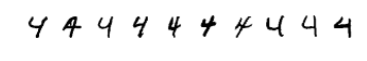

In [120]:
def P5():

### STUDENT START ###
    # set up our K-NN classifier with k=1
    knn = KNeighborsClassifier(n_neighbors = 1)

    # fit the dev data
    knn.fit(dev_data, dev_labels)
    
    #output the confusion matrix using the test_data predicted vs. true values
    print confusion_matrix(test_labels, knn.predict(test_data))

    # It appears that 4's are confused as 9's most often. Let's find some examples.
    # Find the first num_samples of 4's that are mis-classified as 9
    j = 0
    num_samples = 10
    for i, label in enumerate(test_labels):
        if int(label) == 4:
            if int(knn.predict(test_data[i])) == 9:
                c = test_data[i].reshape(28,28)
                plt.subplot(1,num_samples,j+1)
                plt.axis('off')
                plt.imshow(c, cmap='Greys')
                j += 1
                if j > num_samples - 1:
                    break


### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [165]:
def P6():
    
### STUDENT START ###

    def blur(X,X_prime):
        # I'm using a simply computed guassian matrix here, set up so all values sum to 1
        g = np.array([[1.0/16, 1.0/8, 1.0/16],[1.0/8, 1.0/4, 1.0/8],[1.0/16, 1.0/8, 1.0/16]])

        for xx in X:
            # I'm sure I could do this with the original shape, but it's easier for me to think about this way
            x = xx.reshape(28,28)

            # x_prime is the result of the blurring of the original image
            x_prime = np.zeros((28,28))

            # first, calculate the 3x3 sample of the original image but take into account the edge cases
            # of the corners and the top, bottom, left and right columns. The approach here is to generate
            # the sample as if the row and/or column were duplicated from the neighboring row/column
            for row in range (0,27):
                for col in range (0,27):
                    s = np.zeros((3,3))
                    # for each point in x, calculate a 3x3 sample. Duplicate values at the edges to form a complete matrix
                    # I feel really really stupid for doing things this way, but I don't know how best to take care of the 
                    # edge cases...
                    # I just realized there is a much better way to construct this matrix, but I'm out of time...
                    if col==0:
                        if row==0: # upper left corner
                            s[0,0]=x[row,col]
                            s[0,1]=x[row,col]
                            s[0,2]=x[row,col+1]
                            s[1,0]=x[row,col]
                            s[1,1]=x[row,col]
                            s[1,2]=x[row,col+1]
                            s[2,0]=x[row+1,col]
                            s[2,1]=x[row+1,col]
                            s[2,2]=x[row+1,col+1]
                        elif row==27: # lower left corner
                            s[0,0]=x[row-1,col]
                            s[0,1]=x[row-1,col]
                            s[0,2]=x[row-1,col+1]
                            s[1,0]=x[row,col]
                            s[1,1]=x[row,col]
                            s[1,2]=x[row,col+1]
                            s[2,0]=x[row,col]
                            s[2,1]=x[row,col]
                            s[2,2]=x[row,col+1]
                        else: # left column, any other row
                            s[0,0]=x[row-1,col]
                            s[0,1]=x[row-1,col]
                            s[0,2]=x[row-1,col+1]
                            s[1,0]=x[row,col]
                            s[1,1]=x[row,col]
                            s[1,2]=x[row,col+1]
                            s[2,0]=x[row+1,col]
                            s[2,1]=x[row+1,col]
                            s[2,2]=x[row+1,col+1]                
                    elif col==27:
                        if row==0: # upper right corner
                            s[0,0]=x[row,col-1]
                            s[0,1]=x[row,col]
                            s[0,2]=x[row,col]
                            s[1,0]=x[row,col-1]
                            s[1,1]=x[row,col]
                            s[1,2]=x[row,col]
                            s[2,0]=x[row+1,col-1]
                            s[2,1]=x[row+1,col]
                            s[2,2]=x[row+1,col]
                        elif row==27: # lower right corner
                            s[0,0]=x[row-1,col-1]
                            s[0,1]=x[row-1,col]
                            s[0,2]=x[row-1,col]
                            s[1,0]=x[row,col-1]
                            s[1,1]=x[row,col]
                            s[1,2]=x[row,col]
                            s[2,0]=x[row,col-1]
                            s[2,1]=x[row,col]
                            s[2,2]=x[row,col]
                        else: # right edge, any other row
                            s[0,0]=x[row-1,col-1]
                            s[0,1]=x[row-1,col]
                            s[0,2]=x[row-1,col]
                            s[1,0]=x[row,col-1]
                            s[1,1]=x[row,col]
                            s[1,2]=x[row,col]
                            s[2,0]=x[row+1,col-1]
                            s[2,1]=x[row+1,col]
                            s[2,2]=x[row+1,col]
                    else:
                        if row==0:  # top row, any other column
                            s[0,0]=x[row,col-1]
                            s[0,1]=x[row,col]
                            s[0,2]=x[row,col+1]
                            s[1,0]=x[row,col-1]
                            s[1,1]=x[row,col]
                            s[1,2]=x[row,col+1]
                            s[2,0]=x[row+1,col-1]
                            s[2,1]=x[row+1,col]
                            s[2,2]=x[row+1,col+1]
                        elif row==27: # bottom row, any other column
                            s[0,0]=x[row-1,col-1]
                            s[0,1]=x[row-1,col]
                            s[0,2]=x[row-1,col+1]
                            s[1,0]=x[row,col-1]
                            s[1,1]=x[row,col]
                            s[1,2]=x[row,col+1]
                            s[2,0]=x[row,col-1]
                            s[2,1]=x[row,col]
                            s[2,2]=x[row,col+1]
                        else:  # and at last - the general case
                            s[0,0]=x[row-1,col-1]
                            s[0,1]=x[row-1,col]
                            s[0,2]=x[row-1,col+1]
                            s[1,0]=x[row,col-1]
                            s[1,1]=x[row,col]
                            s[1,2]=x[row,col+1]
                            s[2,0]=x[row-1,col-1]
                            s[2,1]=x[row,col]
                            s[2,2]=x[row+1,col+1]
                    # at this point s should represent our image sample 3x3        
                    for j in range (0,2):
                        for k in range (0,2):
                            x_prime[row][col] += s[j][k]*x[row][col]

            X_prime.append(x_prime.reshape(784,))

    
    # Preprocesses the training data but not the dev data
    blurred_train_data = []
    blur(train_data, blurred_train_data)
    
    # fit K-NN with k=1 on the blurred data and check the confusion matrix
    knn_blurred_train = KNeighborsClassifier(n_neighbors = 1)
    knn_blurred_train.fit(blurred_train_data, train_labels)    
    #output the confusion matrix using the dev data predicted vs. true values
    print 'Blurred train data set with dev data set accuracy {0}'.format(knn_blurred_train.score(dev_data, dev_labels))
    print confusion_matrix(dev_labels, knn_blurred_train.predict(dev_data))
    print '\n'

    # Preprocesses the dev data but not the train data
    blurred_dev_data = []
    blur(dev_data, blurred_dev_data)
    
    # let's fit K-NN with k=1 on the train data and check the confusion matrix
    knn_train = KNeighborsClassifier(n_neighbors = 1)
    knn_train.fit(train_data, train_labels)    
    #output the confusion matrix using the blurred dev data predicted vs. true values
    print 'Train data set with blurred dev data set accuracy {0}'.format(knn_train.score(blurred_dev_data, dev_labels))
    print confusion_matrix(dev_labels, knn_train.predict(dev_data))
    print '\n'

    # now let's compare on the blurred train data and compare to the blurred dev data
    print 'Blurred train data set with blurred dev data set accuracy {0}'.format(knn_blurred_train.score(blurred_dev_data, dev_labels))
    print confusion_matrix(dev_labels, knn_blurred_train.predict(blurred_dev_data))    
       
### STUDENT END ###

P6()

Blurred train data set with dev data set accuracy 0.431
[[ 33   5   1   0   1  36  16   4   0   3]
 [  0 104   0   0   0   1   0   0   0   0]
 [  1  37   2   0  13  18  21  10   0   0]
 [  1  22   0  18   6  35   2   2   0   0]
 [  0  17   1   0  55  18   2   8   0   3]
 [  0  17   0   0   2  63   6   0   1   2]
 [  0   1   0   0  14  16  67   0   0   0]
 [  0  27   0   0   3  14   0  51   0  18]
 [  1  35   0   2  16  18   6  11   7   0]
 [  0  30   0   0  27   5   1  12   0  31]]


Train data set with blurred dev data set accuracy 0.953
[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  1   0  98   2   0   0   0   1   0   0]
 [  0   0   0  83   0   1   0   0   1   1]
 [  0   0   0   0 102   0   0   0   0   2]
 [  1   0   0   0   0  88   0   0   1   1]
 [  1   0   0   0   1   0  96   0   0   0]
 [  0   0   1   0   0   0   0 111   0   1]
 [  1   0   1   2   0   2   1   0  89   0]
 [  0   0   0   0   0   0   0   0   0 106]]


Blurred train data set

ANSWER: The gaussian blur operation yields interesting results. The accuracy is very low using the blurred training data but increases dramatically when the training data and dev data sets are blurred. The confusion matrices show that accuracy is not necessarily indicative of precision. There seems to be a tradeoff on some of the digit error rates even though accuracy is increased in the final step. For example, '2' and '7' are a little worse even though there are slight gains elsewhere.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [225]:
def P7():

### STUDENT START ###

    # Bournoulli using a "right tail" cutoff
    bnb = BernoulliNB(binarize=0.84)
    bnb.fit(mini_train_data, mini_train_labels)
    print 'Bournoulli Naive Bayes accuracy at 0.84 threshold is {0}'.format(bnb.score(dev_data, dev_labels))

    # Bournoulli using a "left tail" cutoff
    bnb = BernoulliNB(binarize=0.16)
    bnb.fit(mini_train_data, mini_train_labels)
    print 'Bournoulli Naive Bayes accuracy at 0.16 threshold is {0}'.format(bnb.score(dev_data, dev_labels))
    
    # Bournoulli using a simple 1/2 cutoff point
    bnb = BernoulliNB(binarize=0.5)
    bnb.fit(mini_train_data, mini_train_labels)
    print 'Bournoulli Naive Bayes accuracy at 0.5 threshold is {0}'.format(bnb.score(dev_data, dev_labels))
    
    # use a linear map
    multinomial_data = np.zeros(mini_train_data.shape)
    for i, data in enumerate(mini_train_data):
        for j, pixel in enumerate(data):
            if pixel < 0.33:
                multinomial_data[i][j] = 0
            elif pixel < 0.67:
                multinomial_data[i][j] = 1
            else:
                multinomial_data[i][j] = 2
    mnb = MultinomialNB()
    mnb.fit(multinomial_data, mini_train_labels)
    print 'Multinomial Naive Bayes linear map accuracy is {0}'.format(mnb.score(dev_data, dev_labels))

    # use a guassian map at (16%, 68%, 16%)
    multinomial_data = np.zeros(mini_train_data.shape)
    for i, data in enumerate(mini_train_data):
        for j, pixel in enumerate(data):
            if pixel < 0.16:
                multinomial_data[i][j] = 0
            elif pixel < 0.84:
                multinomial_data[i][j] = 1
            else:
                multinomial_data[i][j] = 2
    mnb = MultinomialNB()
    mnb.fit(multinomial_data, mini_train_labels)
    print 'Multinomial Naive Bayes gaussian map accuracy is {0}'.format(mnb.score(dev_data, dev_labels))    
    
### STUDENT END ###

P7()

Bournoulli Naive Bayes accuracy at 0.84 threshold is 0.786
Bournoulli Naive Bayes accuracy at 0.16 threshold is 0.816
Bournoulli Naive Bayes accuracy at 0.5 threshold is 0.815
Multinomial Naive Bayes linear map accuracy is 0.797
Multinomial Naive Bayes gaussian map accuracy is 0.799


ANSWER: The multinomial classifier is less accurate than the Bernoulli binomial classifier. I experimented with a few different configurations - one using a linear approach of dividing the thresholds for both classifiers by 2 or 3, and the other using a gaussian distribution. The best accuracy result is the simplest using a threshold of around 0.5.

To be honest, I'm not sure I can answer the question of why the multinomial is less accurate than the binomial. Even when playing around with the alpha parameter it's not any better, and the default alpha value of 1.0 seems to give the best accuracy for the multinomial models. Intuitively it seems that giving a 3-level grey scale would be similar to blurring, but it doesn't seem to work that way. So the only thing I can think of that would suggest as to why multinomial is less accurate than bernoulli is because we're adding "noise" into the information by imposing artificial structure to it. To be honest, this answer is not satisfying at all.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [200]:
def P8(alphas):

### STUDENT START ###
    bnb = BernoulliNB(binarize=0.5)
    clf = GridSearchCV(bnb, alphas)
    clf.fit(mini_train_data, mini_train_labels)
    return clf

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

In [229]:
print 'GridSearch best parameter value: {0}'.format(nb.best_params_)
print 'Accuracy of GridSearch best parameter model {0}'.format(nb.best_score_)

alpha =0.0
bnb = BernoulliNB(alpha=alpha, binarize=0.5)
bnb.fit(mini_train_data, mini_train_labels)
print 'Accuracy with alpha {0}: {1}'.format(alpha, bnb.score(dev_data, dev_labels))

GridSearch best parameter value: {'alpha': 0.01}
Accuracy of GridSearch best parameter model 0.821
Accuracy with alpha 0.0: 0.099


ANSWER: The GridSearchCV claims the best alpha is 0.01 with an accuracy score of 0.821. When alpha is set to 0.0 the accuracy score is very poor, around 0.01 (!). It's not what I expected, but when I think about the smoothing and the fact that it allows for the idea that there is always a chance that something else could be observed I think it makes sense. 

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [321]:
def P9():

### STUDENT END ###
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    print 'Raw Gaussian accuracy:\t\t\t{0}'.format(gnb.score(dev_data, dev_labels))
    for i, sigma in enumerate(gnb.sigma_):
        gnb.sigma_[i] = np.add(sigma,0.02005)
    for i, theta in enumerate(gnb.theta_):
        gnb.theta_[i] = np.add(theta, -0.115)
    print 'Modified parameter Gaussian accuracy:\t{0}'.format(gnb.score(dev_data, dev_labels))

### STUDENT END ###

gnb = P9()

Raw Gaussian accuracy:			0.627
Modified parameter Gaussian accuracy:	0.806


ANSWER: The variance parameter, sigma, is very tight. Adding a small constant to the variance helps loosen the model a bit to achieve a little better accuracy. I used a variety of different modifiers: powers, multipliers, exponentiation, logs, etc. but the most effective seems to be to add. Modifying theta by making it slightly smaller also increases the accuracy somewhat.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

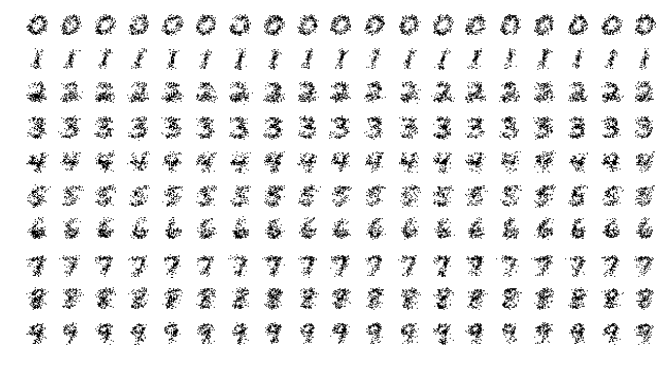

In [367]:
def P10(num_examples):

### STUDENT START ###
    # train the bernoulli model
    bnb = BernoulliNB(alpha=0.01, binarize=0.5)
    bnb.fit(mini_train_data, mini_train_labels)
    
    # calculate the feature probabilities from the log probabilities for each feature in the model
    feature_probs = np.exp(bnb.feature_log_prob_)

    # Set the size of the plot area so we can see it :)
    plt.figure(figsize=(num_examples*6/10,6))   
    
    # Generate num_examples of random arrays to generate num_examples of each digit
    for j in range (0,num_examples-1):
        # generate a random np.array
        rand_array = np.random.rand(784)
        # generate the digit by creating a binomial valued array by comparing with the 
        # probability model for the class
        digit = rand_array < feature_probs
       
        # plot the generated digits
        for i in range (0,10):
            c = digit[i].reshape(28,28)
            plt.subplot(10,num_examples,i*num_examples + j+1)
            plt.axis('off')
            plt.imshow(c, cmap='binary')


### STUDENT END ###

P10(20)

ANSWER: Besides the fact that I'm kinda amazed that these look as good as they do, they appear noisy, like little shotgun blast patterns in the shape of digits :) These have the same general shape of the training digits plus the noise. Out of curiousity I re-ran the model using the larger train_data set and there was only slight improvement in the noise factor.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [389]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    # train the bernoulli model
    bnb = BernoulliNB(alpha=0.01, binarize=0.5)
    bnb.fit(mini_train_data, mini_train_labels)
    
    # get the class probability vector for each test vector
    class_probabilities = bnb.predict_proba(dev_data)
    
    for i, probs in enumerate(class_probabilities):
        # get the index of the largest probability in the array - it will be the predicted class
        label = np.argmax(probs)

        # increment the bucket to which the probability belongs
        for j in range (len(buckets)-1,0,-1):
            if probs[label] >= buckets[j]:
                total[j] += 1.0
                # if the class is correctly predicted, increment the correct count for the bucket
                if int(dev_labels[i]) == label:
                    correct[j] += 1.0
                break
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  86    accuracy = 0.465
p(pred) <= 0.9990000000000    total =  85    accuracy = 0.612
p(pred) <= 0.9999900000000    total =  58    accuracy = 0.690
p(pred) <= 0.9999999000000    total =  61    accuracy = 0.754
p(pred) <= 0.9999999990000    total =  73    accuracy = 0.877
p(pred) <= 0.9999999999900    total =  75    accuracy = 0.840
p(pred) <= 0.9999999999999    total =  34    accuracy = 0.882
p(pred) <= 1.0000000000000    total = 498    accuracy = 0.958


ANSWER:  The accuracy of the classifier increases with the confidence/probability values; therefore the classifier is calibrated.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [455]:
def P12():

### STUDENT START ###
    def pre_process(X):
        # Pre process the data set in X into a new data set in X_prime that has 1 more row and column
        # I'm assuming X consists of character data in a 28x28 matrix so I don't have to generalize
        # too much...
    
        # create a new data set from the train data set with a 29x29 array instead of 28x28
        X_prime = np.zeros(shape=(X.shape[0], 29*29), dtype=np.float)

        # process the train set to sum rows and columns
        for i, sample in enumerate(X):
            # copy the sample into the larger array so that the right column and bottom row remain zeroes
            X_prime[i][:784] = sample
            c = X_prime[i].reshape(29,29)
            # sum each row into the right column
            for row in range (0,28):
                for col in range (0,28):
                    c[row][28] += c[row][col]
            # sum each column into the bottom row
            for col in range (0,28):
                for row in range (0,28):
                    c[28][col] += c[row][col]
            X_prime[i] = c.reshape(841)
            
        return X_prime

    # preprocess the mini_train_data into the p_mini_train_data
    p_mini_train_data = pre_process(mini_train_data)
 
    # train a bernoulli classifier with the preprocessed data
    bnb = BernoulliNB(alpha=1.0, binarize=0.5)
    bnb.fit(p_mini_train_data, mini_train_labels)
    
    # process the dev_data like we did the training set
    p_dev_data = pre_process(dev_data)
    print bnb.score(p_dev_data, dev_labels)
    print classification_report(bnb.predict(p_dev_data), dev_labels, target_names=class_names)
    print
    print confusion_matrix(dev_labels, bnb.predict(p_dev_data))


    
### STUDENT END ###

P12()

0.829
             precision    recall  f1-score   support

          0       0.98      0.92      0.95       105
          1       0.96      0.86      0.91       117
          2       0.81      0.86      0.84        96
          3       0.74      0.62      0.68       103
          4       0.78      0.90      0.84        90
          5       0.66      0.85      0.74        71
          6       0.90      0.93      0.91        95
          7       0.81      0.88      0.85       104
          8       0.75      0.77      0.76        93
          9       0.86      0.72      0.78       126

avg / total       0.83      0.83      0.83      1000


[[ 97   0   0   1   0   0   1   0   0   0]
 [  0 101   0   0   0   1   1   0   2   0]
 [  4   2  83   5   0   0   0   3   5   0]
 [  0   3   6  64   0   2   1   1   6   3]
 [  0   1   1   0  81   0   3   2   4  12]
 [  0   0   1  21   2  60   1   1   1   4]
 [  2   1   3   0   2   2  88   0   0   0]
 [  1   4   1   1   1   0   0  92   2  11]
 [  0   4 